In [2]:
import itertools as it
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def dicke_state_list(N, k):
    indices = list(it.combinations(range(N), k))
    result = []
    
    for idx in indices:
        arr = ['0'] * N
        for i in idx:
            arr[i] = '1'
        result.append(int("".join(arr),2))
    
    return result

def compute_QFI(hd_matrix : np.ndarray, N:int, degeneracy:int):
    return max(
                (4 / degeneracy)
                * ((linalg.norm(hd_matrix, axis=1)) ** 2 - (1 / degeneracy) * (np.sum(hd_matrix, axis=1)) ** 2)
            ) / (N**2)

def compute_QFI_PA(H,P,N):

    return max(
                4 * (np.sum(H * H * P, axis=1) - np.sum(H * P, axis=1) ** 2)
            ) / (N**2)

def calculate_hamming_distances(gs_array, degeneracy):
    """Calculate Hamming distances and spins involved from the ground state array."""
    
    hd_list = []
    hd_matrix = np.zeros((degeneracy, degeneracy))
    spins_involved = 0
    


    for gs_i in range(degeneracy):
        for gs_j in range(gs_i + 1, degeneracy):
            binary_diff = gs_array[gs_i] ^ gs_array[gs_j]
            h_d = binary_diff.bit_count()
            hd_list.append(h_d)
            hd_matrix[gs_i][gs_j] = hd_matrix[gs_j][gs_i] = h_d
            spins_involved |= binary_diff

    return hd_list, hd_matrix, spins_involved.bit_count()


def compute_overlap_distribution(hd_list, N, degeneracy):
    """Compute the overlap distribution and related statistics."""
    overlap_dist = np.zeros(N + 1)
    overlap_dist[-1] = 1 / degeneracy

    for hd in hd_list:
        overlap_dist[-hd - 1] += 2 / (degeneracy**2)

    od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
    od_mean = np.sum(od_bins * overlap_dist)
    od_var = np.sum(overlap_dist * (od_bins - od_mean) ** 2)

    return overlap_dist, od_mean, od_var


def base_N_hamming_distance(i: int, j: int) -> int:
    return (i ^ j).bit_count()

def overlap_distribution_weighted(
    gs_list: list[int], gs_probs: list[float], N: int
) -> np.ndarray:
    gs_size = len(gs_list)
    overlap_dist = np.zeros(N + 1)
    for i in range(gs_size):
        for j in range(i, gs_size):
            h_d = base_N_hamming_distance(gs_list[i], gs_list[j])
            overlap_dist[-h_d - 1] += (1  if i == j else 2) * gs_probs[i] * gs_probs[j]
    return overlap_dist

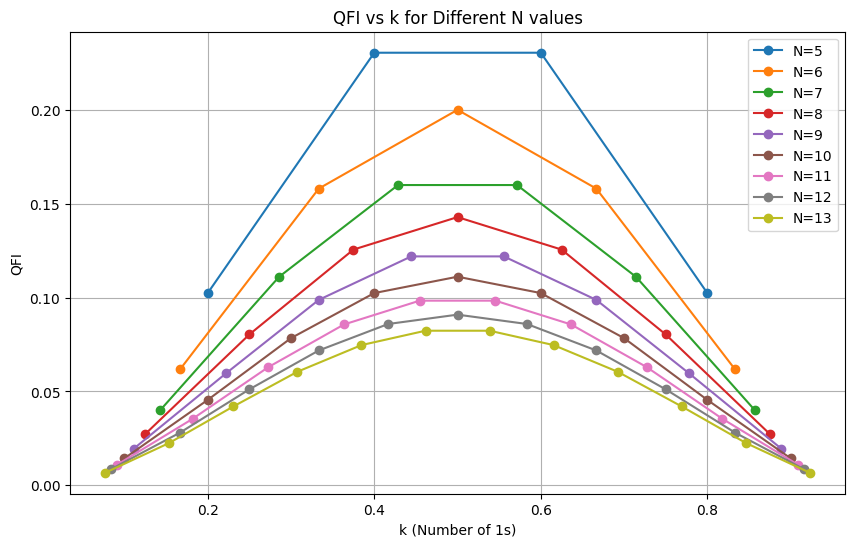

In [40]:
N_values = range(5, 14)

plt.figure(figsize=(10, 6))

for N in N_values:
    data = []
    
    for k in range(1, N):

        gs_array = dicke_state_list(N, k)
        degeneracy = len(gs_array)

        _, hd_matrix, _ = calculate_hamming_distances(gs_array, degeneracy)

        qfi = compute_QFI(hd_matrix, N, degeneracy)
        data.append(qfi)
    
    x_values = [i/N for i in range(1, N) ]# k values
    plt.plot(x_values, data, marker='o', linestyle='-', label=f"N={N}")

plt.xlabel("k (Number of 1s)")
plt.ylabel("QFI")
plt.title("QFI vs k for Different N values")
plt.grid(True)
plt.legend()

plt.show()

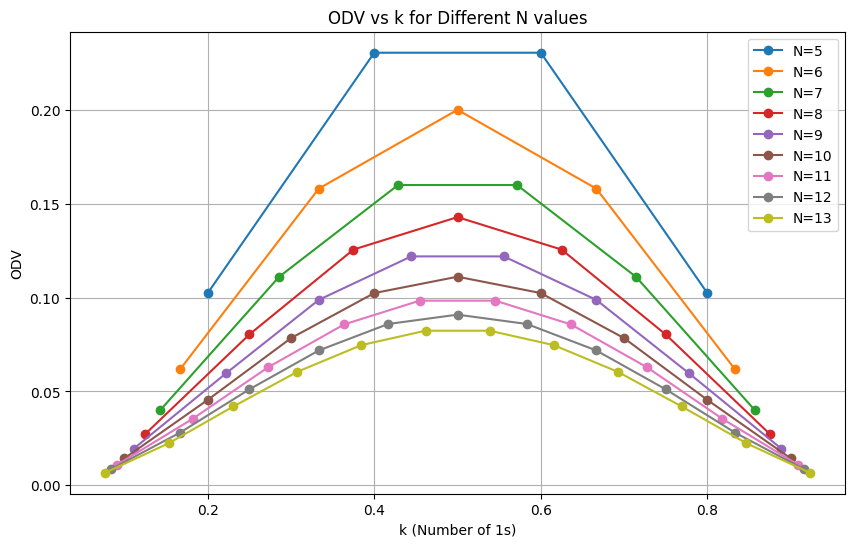

In [41]:
N_values = range(5, 14)

plt.figure(figsize=(10, 6))

for N in N_values:
    data = []
    
    for k in range(1, N):
        gs_array = dicke_state_list(N, k)
        degeneracy = len(gs_array)
        hd_list, _, _ = calculate_hamming_distances(gs_array, degeneracy)
        _,_,odv = compute_overlap_distribution(hd_list,N,degeneracy)
        data.append(odv)
    
    x_values = [i/N for i in range(1, N) ]# k values
    plt.plot(x_values, data, marker='o', linestyle='-', label=f"N={N}")

plt.xlabel("k (Number of 1s)")
plt.ylabel("ODV")
plt.title("ODV vs k for Different N values")
plt.grid(True)
plt.legend()

plt.show()

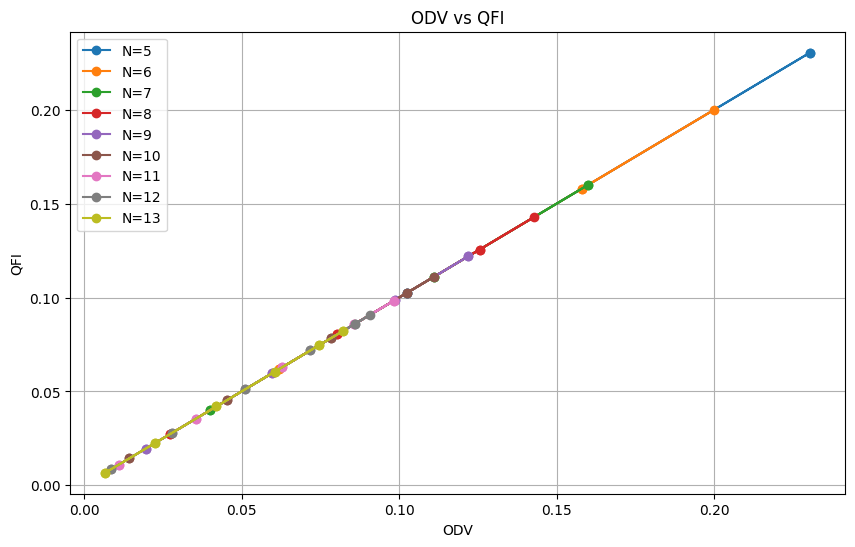

In [43]:
N_values = range(5, 14)

plt.figure(figsize=(10, 6))

for N in N_values:
    data_odv = []
    data_qfi = []

    for k in range(1, N):
        gs_array = dicke_state_list(N, k)
        degeneracy = len(gs_array)
        hd_list, hd_matrix, _ = calculate_hamming_distances(gs_array, degeneracy)
        qfi = compute_QFI(hd_matrix, N, degeneracy)
        _,_,odv = compute_overlap_distribution(hd_list,N,degeneracy)
        data_odv.append(odv)
        data_qfi.append(qfi)
    
    plt.plot(data_odv, data_qfi, marker='o', linestyle='-', label=f"N={N}")

plt.xlabel("ODV")
plt.ylabel("QFI")
plt.title("ODV vs QFI")
plt.grid(True)
plt.legend()

plt.show()

In [64]:
N_values = range(5, 6)

# plt.figure(figsize=(10, 6))

for N in N_values:
    data = []
    
    for k in range(1, 2):

        gs_array = dicke_state_list(N, k)

        print([bin(gs)[2:] for gs in gs_array])

        print("--------")

        
        degeneracy = len(gs_array)

        hd_list, hd_matrix, _ = calculate_hamming_distances(gs_array, degeneracy)

        overlap_dist,_,odv = compute_overlap_distribution(hd_list,N,degeneracy)

        od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])

        print(overlap_dist)
        # print(np.var(overlap_dist))
        print(odv)

        print("-----")

        for row in (N-2*hd_matrix):
            print(row)

        qfi = compute_QFI(hd_matrix, N, degeneracy)
        print(qfi)
        data.append(qfi)
    
    # x_values = [i/N for i in range(1, N) ]# k values
    # plt.plot(x_values, data, marker='o', linestyle='-', label=f"N={N}")

# plt.xlabel("k (Number of 1s)")
# plt.ylabel("QFI")
# plt.title("QFI vs k for Different N values")
# plt.grid(True)
# plt.legend()

# plt.show()

['10000', '1000', '100', '10', '1']
--------
[0.  0.  0.  0.8 0.  0.2]
0.10240000000000002
-----
[5. 1. 1. 1. 1.]
[1. 5. 1. 1. 1.]
[1. 1. 5. 1. 1.]
[1. 1. 1. 5. 1.]
[1. 1. 1. 1. 5.]
0.10239999999999999


In [70]:
# [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
# [ 0,  0,  0,  0,  0, 0, 4, 0  0, 0, 1]

N = 16

gs_array = [9027, 9826, 32327]

print([bin(gs)[2:] for gs in gs_array])

degeneracy = len(gs_array)
hd_list, hd_matrix, _ = calculate_hamming_distances(gs_array, degeneracy)


qfi = compute_QFI(hd_matrix, N, degeneracy)
overlap_dist,_,odv = compute_overlap_distribution(hd_list,N,degeneracy)


print(overlap_dist)
print("-----------")
print(hd_matrix)
print(N-2*hd_matrix)
print("qfi:",qfi)
print("odv:", odv)


['10001101000011', '10011001100010', '111111001000111']
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44444444 0.
 0.22222222 0.         0.         0.         0.33333333]
-----------
[[0. 4. 6.]
 [4. 0. 6.]
 [6. 6. 0.]]
[[16.  8.  4.]
 [ 8. 16.  4.]
 [ 4.  4. 16.]]
qfi: 0.12499999999999992
odv: 0.10802469135802469


In [44]:

N = 16

gs_array = [9027, 9826, 32327]

degeneracy = len(gs_array)


post_anneal_gs_probs = [1/3, 1/3, 1/3]

post_anneal_overlap_dist = overlap_distribution_weighted(gs_array,post_anneal_gs_probs,N)


# P = np.zeros((degeneracy, degeneracy))
# for i in range(degeneracy):
#     for j in range(i, degeneracy):
#         P[i][j] =  post_anneal_gs_probs[j]
P = np.array( [np.array(post_anneal_gs_probs), np.array(post_anneal_gs_probs), np.array(post_anneal_gs_probs)])







hd_list, hd_matrix, _ = calculate_hamming_distances(gs_array, degeneracy)




# qfi = compute_QFI(hd_matrix, N, degeneracy)
qfi_pa = compute_QFI_PA(hd_matrix,P,N)
# overlap_dist,_,odv = compute_overlap_distribution(hd_list,N,degeneracy)

od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
od_mean = np.sum(od_bins * post_anneal_overlap_dist)
od_var = np.sum(post_anneal_overlap_dist * (od_bins - od_mean) ** 2)

print([bin(gs)[2:] for gs in gs_array])
print(P)
print(P*hd_matrix)
print(post_anneal_overlap_dist)
print("-----------")
print(hd_matrix)
print(N-2*hd_matrix)
print(N-2*hd_matrix*P)
print("od_mean:", od_mean)
print("qfi:",qfi_pa)
print("odv:", od_var)

['10001101000011', '10011001100010', '111111001000111']
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0.         1.33333333 2.        ]
 [1.33333333 0.         2.        ]
 [2.         2.         0.        ]]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44444444 0.
 0.22222222 0.         0.         0.         0.33333333]
-----------
[[0. 4. 6.]
 [4. 0. 6.]
 [6. 6. 0.]]
[[16.  8.  4.]
 [ 8. 16.  4.]
 [ 4.  4. 16.]]
[[16.         13.33333333 12.        ]
 [13.33333333 16.         12.        ]
 [12.         12.         16.        ]]
od_mean: 0.5555555555555556
qfi: 0.125
odv: 0.10802469135802469


In [74]:
post_anneal_gs_probs = np.array([0.622084480791379, 0.37782277776268375, 3.331764465814021e-18])
np.sum(post_anneal_gs_probs * post_anneal_gs_probs)

0.5297391526377899

In [84]:
1/np.sqrt(8)
1/16

0.0625

In [100]:
l = [16, 16, 16, 16, 16, 16, 12, 12, 12, 12]

l = [16,-16]

mean = np.mean(l)

variance = np.mean([(li - mean)**2 for li in l]) 

qfi = 4*variance

neff = (1/(4*16))*variance


neff_normed = neff/16



print("mean:",mean)
print("var:",variance)
print("qfi:",qfi)
print("neff:",neff)

print("neffnorm:",neff_normed)

mean: 0.0
var: 256.0
qfi: 1024.0
neff: 4.0
neffnorm: 0.25


In [102]:
0.6 * 0.4 + 0.6 *0.4

0.48

In [17]:
(0.4)*(16) - ((0.4)*(4))**2 

3.84

In [16]:
(0.6)*(16) - ((0.6)*(4))**2


3.84

In [33]:
((0.5)*(36) + (0.5)*(36) - ((0.5)*(6) + (0.5)*(6))**2)

0.0

In [35]:
(0.75 * 0.75) + (0.25 * 0.25)

0.625

In [36]:
2 * (0.25*0.75)

0.375